In [46]:
from pyhere import here
import os

os.chdir(here())

In [47]:
import geopandas as gpd
from src.ingestion.ogc import WCSDownloader
aoi = gpd.read_file('src/ingestion/tests/data/aoi.geojson')
aoi = aoi.to_crs(epsg=27700)
aoi["geometry"] = aoi.buffer(500)

aoi.explore()

In [48]:
aoi.total_bounds


array([412392.5283444 , 447395.63762476, 414044.85501632, 449042.56849954])

In [49]:
ea_dtm = WCSDownloader(
    endpoint="https://environment.data.gov.uk/spatialdata/lidar-composite-digital-terrain-model-dtm-1m/wcs",    
    coverage_id="13787b9a-26a4-4775-8523-806d13af58fc__Lidar_Composite_Elevation_DTM_1m",
    request_tile_pixels=(100, 100),
)



In [50]:
array = await ea_dtm.get_coverage(tuple(aoi.total_bounds), resolution=10)

ERROR 1: TIFFReadEncodedTile:Read error at row 4294967295, col 4294967295; got 0 bytes, expected 36864
ERROR 1: TIFFReadEncodedTile() failed.
ERROR 1: /vsimem/931341cd-73ca-4d7c-a205-ab223e59cf04/931341cd-73ca-4d7c-a205-ab223e59cf04.tif, band 1: IReadBlock failed at X offset 1, Y offset 0: TIFFReadEncodedTile() failed.


RasterioIOError: Read or write failed. /vsimem/931341cd-73ca-4d7c-a205-ab223e59cf04/931341cd-73ca-4d7c-a205-ab223e59cf04.tif, band 1: IReadBlock failed at X offset 1, Y offset 0: TIFFReadEncodedTile() failed.

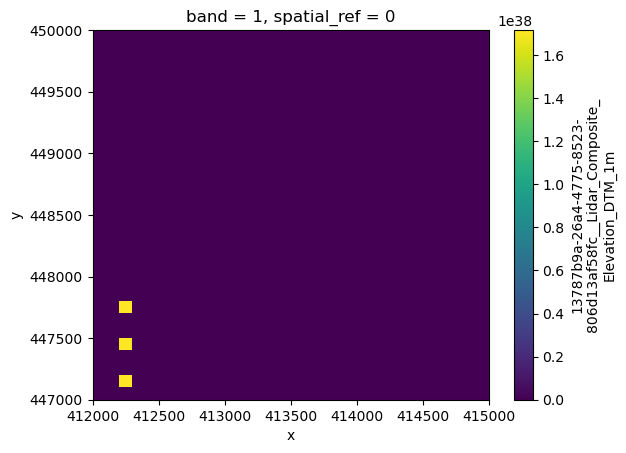

In [ ]:
import rioxarray as rxr

#array = array.coarsen(x=100,y=100, boundary="trim").mean()


array[ea_dtm.coverage_id].plot()

In [ ]:
array.to_array().shape

(1, 1, 1000, 1000)